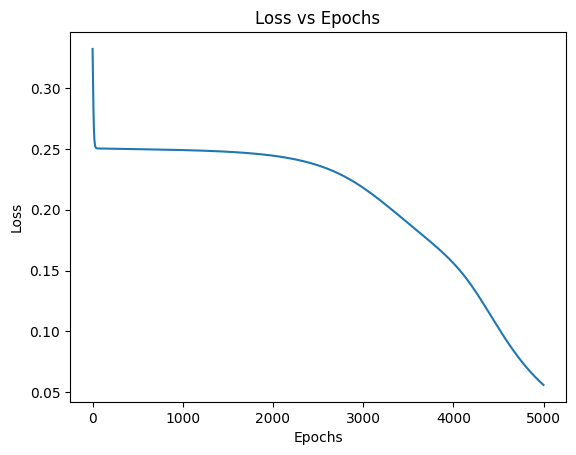

[[0.]
 [1.]
 [1.]
 [0.]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

np.random.seed(42)
W1 = np.random.rand(2,4)
b1 = np.random.rand(1,4)
W2 = np.random.rand(4,1)
b2 = np.random.rand(1,1)

learning_rate = 0.1
epochs = 5000
loss_list = []

for _ in range(epochs):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)
    loss = np.mean((y - y_hat) ** 2)
    loss_list.append(loss)
    error = y - y_hat
    d_output = error * sigmoid_derivative(y_hat)
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

print(y_hat.round())